In [1]:
import numpy as np
from tqdm import tqdm
import pandas as pd
from astropy.table import Table
from astropy.io import fits
from astropy.io import ascii

hdul = fits.open('..\\Fermi-LAT Data\\gll_psc_v32.fit')
print(hdul[1])

table = Table.read('..\\Fermi-LAT Data\\gll_psc_v32.fit',hdu=1)
ascii.write(table, '..\\Fermi-LAT Data\\hdu1.ecsv', overwrite=True, format = 'ecsv')


In [2]:
table = ascii.read('..\Fermi-LAT Data\hdu1.txt')
fermi_lat = table.to_pandas()
fermi_lat.to_csv('..\Fermi-LAT Data\hdu1.csv')
redshifts = pd.read_csv('..\\Fermi-LAT Data\\redshift_predictions.csv')

# ONE HOT ENCODING OF SPECTRUMTYPE

PLCount = np.zeros(len(fermi_lat['SpectrumType']))
LPCount = np.zeros(len(fermi_lat['SpectrumType']))
PLECCount = np.zeros(len(fermi_lat['SpectrumType']))

for i in range(0,len(fermi_lat['SpectrumType'])):
    if fermi_lat['SpectrumType'][i] == 'PowerLaw':
        PLCount[i] = 1
    if fermi_lat['SpectrumType'][i] == 'LogParabola':
        LPCount[i] = 1
    if fermi_lat['SpectrumType'][i] == 'PLSuperExpCutoff':
        PLECCount[i] = 1

fermi_lat['PL'] = PLCount
fermi_lat['LP'] = LPCount
fermi_lat['PLEC'] = PLECCount

print(len(fermi_lat))
fl = fermi_lat.drop(columns=['ROI_num','RA_Counterpart','DEC_Counterpart','Conf_68_SemiMajor', 'Conf_68_SemiMinor', 'Conf_68_PosAng',
       'Conf_95_SemiMajor', 'Conf_95_SemiMinor', 'Conf_95_PosAng','RAJ2000', 'DEJ2000','DataRelease','GLON','GLAT','Source_Name',
       'Extended_Source_Name','ASSOC_4FGL','ASSOC_FGL','ASSOC_FHL','ASSOC_GAM1','ASSOC_GAM2','ASSOC_GAM3','TEVCAT_FLAG',
       'ASSOC_TEV','CLASS1','CLASS2','ASSOC1','ASSOC2','Flags','SpectrumType'])

'''
The above columns are dropped because they are either positional data or non-numerical data.

Uncertainty data is also dropped below.

'''

fl_classes = fermi_lat['CLASS1']
fl_classes.to_csv('fl_classes.csv')

uncertainties = np.array([])
for x in fl.columns:
    if 'Unc' in x:
        uncertainties = np.append(uncertainties,x)
fl = fl.drop(columns=uncertainties)

print(len(fl)-2363)
df=fl
column_list = df.columns
nan_count = np.zeros(len(column_list))
for i in range(0,len(column_list)):
    x=column_list[i]
    n_nans = len(df[x])-df[x].count()
    #print('nans in ' + x + ': ' + str(n_nans))
    nan_count[i] = n_nans

print(sum(nan_count))

7195
4832
3697.0


In [3]:
col0 = np.zeros(len(fl))
col1 = np.zeros(len(fl))
col2 = np.zeros(len(fl))
col3 = np.zeros(len(fl))
col4 = np.zeros(len(fl))
col5 = np.zeros(len(fl))
col6 = np.zeros(len(fl))
col7 = np.zeros(len(fl))

columnlist = ['Flux_Band', 'nuFnu_Band', 'Sqrt_TS_Band',
       'Flux_History','Sqrt_TS_History']

for name in columnlist:    
    for i in range(0,len(fl)):
        obj_data = fl[name][i]
        obj_data = obj_data.replace('[','') 
        obj_data = obj_data.replace(']','') 
        obj_data = obj_data.replace('null','0')
        float_data = [float(idx) for idx in obj_data.split(',')]
        for x in range(0,len(float_data)):
            if float_data[x] == 0:
                float_data[x] = np.nan

        col0[i] = float_data[0]
        col1[i] = float_data[1]
        col2[i] = float_data[2]
        col3[i] = float_data[3]
        col4[i] = float_data[4]
        col5[i] = float_data[5]
        col6[i] = float_data[6]
        col7[i] = float_data[7]
    fl[name + '_0'] = col0
    fl[name+'_1'] = col1
    fl[name+'_2'] = col2
    fl[name+'_3'] = col3
    fl[name+'_4'] = col4
    fl[name+'_5'] = col5
    fl[name+'_6'] = col6
    fl[name+'_7'] = col7

fl = fl.drop(columns=columnlist)

cl = pd.read_csv('..\\Fermi-LAT Data\\fl_classes_numerical.csv',index_col=0)


In [5]:
'''column_list = fl.columns
nan_count = np.zeros(len(column_list))


fl = fl.replace(np.inf,np.nan)
fl = fl.replace(-np.inf,np.nan)

''''''
REPLACING ALL INFINITE VALUES WITH NaN BECAUSE SCIKIT LEARN CANNOT READ THEM
''''''

for i in range(0,len(column_list)):
    n_nans = (1 - (fl[column_list[i]].count()/len(fl[column_list[i]]))) * 100
    #print('nans in ' + x + ': ' + str(n_nans))
    nan_count[i] = n_nans


nan_data = np.stack((column_list,nan_count),axis=1)
nc = pd.DataFrame(nan_data,columns=['Parameter','Percentage NaNs'])
nc = nc.drop([0])
#nc.to_csv('NaN_percentage_by_column.csv')

drop_cols = np.array([])

for i in range(1,len(nc)):
    if nc['Parameter'][i] == 'CLASS1':
        pass
    elif nc['Percentage NaNs'][i] >= 0.001 :
        nc_sub20 = nc.drop([i])
        drop_cols = np.append(drop_cols,nc['Parameter'][i])

#nc_sub20.to_csv('NaN_percentage_by_column_sub20.csv')

fl_sub20 = fl.drop(columns=drop_cols)

fl = fl_sub20.dropna()
print(drop_cols)
'''

"column_list = fl.columns\nnan_count = np.zeros(len(column_list))\n\n\nfl = fl.replace(np.inf,np.nan)\nfl = fl.replace(-np.inf,np.nan)\n\n\nREPLACING ALL INFINITE VALUES WITH NaN BECAUSE SCIKIT LEARN CANNOT READ THEM\n\n\nfor i in range(0,len(column_list)):\n    n_nans = (1 - (fl[column_list[i]].count()/len(fl[column_list[i]]))) * 100\n    #print('nans in ' + x + ': ' + str(n_nans))\n    nan_count[i] = n_nans\n\n\nnan_data = np.stack((column_list,nan_count),axis=1)\nnc = pd.DataFrame(nan_data,columns=['Parameter','Percentage NaNs'])\nnc = nc.drop([0])\n#nc.to_csv('NaN_percentage_by_column.csv')\n\ndrop_cols = np.array([])\n\nfor i in range(1,len(nc)):\n    if nc['Parameter'][i] == 'CLASS1':\n        pass\n    elif nc['Percentage NaNs'][i] >= 0.001 :\n        nc_sub20 = nc.drop([i])\n        drop_cols = np.append(drop_cols,nc['Parameter'][i])\n\n#nc_sub20.to_csv('NaN_percentage_by_column_sub20.csv')\n\nfl_sub20 = fl.drop(columns=drop_cols)\n\nfl = fl_sub20.dropna()\nprint(drop_cols)\n"

In [4]:
fl_cl = pd.merge(fl,cl,left_index=True,right_index=True)


#fl_cl.dropna()


mask1 = fl_cl['CLASS1'] == 4
#mask2 = fl_cl['CLASS1'] == 0

fl_cl = fl_cl[~mask1]
#fl_cl = fl_cl[~mask2]


In [5]:
column_list = fl.columns
nan_count = np.zeros(len(column_list))


fl = fl.replace(np.inf,np.nan)
fl = fl.replace(-np.inf,np.nan)

'''
REPLACING ALL INFINITE VALUES WITH NaN BECAUSE SCIKIT LEARN CANNOT READ THEM
'''

for i in range(0,len(column_list)):
    n_nans = (1 - (fl[column_list[i]].count()/len(fl[column_list[i]]))) * 100
    #print('nans in ' + x + ': ' + str(n_nans))
    nan_count[i] = n_nans


nan_data = np.stack((column_list,nan_count),axis=1)
nc = pd.DataFrame(nan_data,columns=['Parameter','Percentage NaNs'])
nc = nc.drop([0])
nc.to_csv('..\\Fermi-LAT Data\\NaN_percentage_by_column.csv')

drop_cols = np.array([])

for i in range(1,len(nc)):
    if nc['Parameter'][i] == 'CLASS1':
        pass
    elif nc['Percentage NaNs'][i] >= 1 :
        nc_sub20 = nc.drop([i])
        drop_cols = np.append(drop_cols,nc['Parameter'][i])

#nc_sub20.to_csv('NaN_percentage_by_column_sub20.csv')

fl_sub20 = fl.drop(columns=drop_cols)

fl = fl_sub20.dropna()
print(drop_cols)

['LP_EPeak' 'PLEC_EPeak' 'Signif_Peak' 'Flux_Peak' 'Time_Peak'
 'Peak_Interval' 'ASSOC_PROB_BAY' 'ASSOC_PROB_LR' 'Sqrt_TS_Band_0'
 'Sqrt_TS_Band_1' 'Sqrt_TS_Band_2' 'Sqrt_TS_Band_4' 'Sqrt_TS_Band_5'
 'Sqrt_TS_Band_6' 'Sqrt_TS_Band_7' 'Sqrt_TS_History_0' 'Sqrt_TS_History_1'
 'Sqrt_TS_History_2' 'Sqrt_TS_History_3' 'Sqrt_TS_History_4'
 'Sqrt_TS_History_5' 'Sqrt_TS_History_6']


In [8]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
'''
def LogParabola(E,E_0,K,alpha,beta):
    # E is the independent variable, E_0 is the Pivot_Energy, K is LP_Flux_Density, alpha is LP_Index, and beta is LP_beta
    return K*((E/E_0)**(-alpha-(beta*np.log(E/E_0))))

def PLSuperExpCutoff(E,E_0,K,gamma,b,d):
    # E is the independent variable, E_0 is the Pivot_Energy, K is PLEC_Flux_Density, gamma is PLEC_Index, a is PLEC_Expfactor and b is PLEC_Exp_Index
    return K*((E/E_0)**((d/b)-gamma))*(np.exp((d/(b**2))*(1-(E/E_0)**b)))

def PowerLaw(E,E_0,K,gamma):
    # E is the independent variable, E_0 is the Pivot_Energy, K is PL_Flux_Density, gamma is PL_Index
    return K*((E/E_0)**(-gamma))

E = np.arange(50*10**6, 1*10**12,10**6)

index = 42
E_0 = fl['Pivot_Energy'][index]
K_pl = fl['PL_Flux_Density'][index]
gamma_pl = fl['PL_Index'][index]
K_plec = fl['PLEC_Flux_Density'][index]
gamma_plec = fl['PLEC_IndexS'][index]
d_plec = fl['PLEC_ExpfactorS'][index]
b_plec = fl['PLEC_Exp_Index'][index]
K_lp = fl['LP_Flux_Density'][index]
alpha_lp = fl['LP_Index'][index]
beta_lp = fl['LP_beta'][index]


fluxband = [fl['Flux_Band_0'][index],fl['Flux_Band_1'][index],fl['Flux_Band_2'][index],fl['Flux_Band_3'][index],fl['Flux_Band_4'][index],
            fl['Flux_Band_5'][index],fl['Flux_Band_6'][index],fl['Flux_Band_7'][index]]

# 50-100MeV, 100-300MeV, 300MeV-1GeV,1-3GeV,3-10GeV,10-30GeV,30-100GeV,100GeV-1TeV
locs = [75*10**6,200*10**6,650*10**6,2*10**9,6.5*10**9,20*10**9,65*10**9,550*10**9]
widths = [50*10**6,200*10**6,700*10**6,2*10**9,7*10**9,20*10**9,70*10**9,900*10**9]

avgN = np.array(fluxband)/np.array(widths)


#how many N between 2 energies, divide by width of limits to get average N
N=np.zeros(len(E-1))
if fermi_lat['SpectrumType'][index]=='LogParabola':
    print('LP')
    for i in range(0,len(E)-1):
        res1,err1=quad(LogParabola,E[i],E[i+1],args=(E_0,K_lp,alpha_lp,beta_lp))
        res = res1/10**6
        N[i]=res
elif fermi_lat['SpectrumType'][index] == 'PLSuperExpCutoff':
    print('PLEC')
    for i in range(0,len(E)-1):
        res1,err1=quad(PLSuperExpCutoff,E[i],E[i+1],args=(E_0,K_plec,gamma_plec,b_plec,d_plec))
        res = res1
        N[i]=res
elif fermi_lat['SpectrumType'][index] == 'PowerLaw':
    print('PL')
    for i in range(0,len(E)-1):
        res1,err1=quad(PowerLaw,E[i],E[i+1],args=(E_0,K_pl,gamma_pl))
        res = res1
        N[i]=res


fig, ax = plt.subplots()
ax.plot(E,N)
print(N)
ax.scatter(locs,avgN)
ax.set_xlim(0,10**(12)) '''


"\ndef LogParabola(E,E_0,K,alpha,beta):\n    # E is the independent variable, E_0 is the Pivot_Energy, K is LP_Flux_Density, alpha is LP_Index, and beta is LP_beta\n    return K*((E/E_0)**(-alpha-(beta*np.log(E/E_0))))\n\ndef PLSuperExpCutoff(E,E_0,K,gamma,b,d):\n    # E is the independent variable, E_0 is the Pivot_Energy, K is PLEC_Flux_Density, gamma is PLEC_Index, a is PLEC_Expfactor and b is PLEC_Exp_Index\n    return K*((E/E_0)**((d/b)-gamma))*(np.exp((d/(b**2))*(1-(E/E_0)**b)))\n\ndef PowerLaw(E,E_0,K,gamma):\n    # E is the independent variable, E_0 is the Pivot_Energy, K is PL_Flux_Density, gamma is PL_Index\n    return K*((E/E_0)**(-gamma))\n\nE = np.arange(50*10**6, 1*10**12,10**6)\n\nindex = 42\nE_0 = fl['Pivot_Energy'][index]\nK_pl = fl['PL_Flux_Density'][index]\ngamma_pl = fl['PL_Index'][index]\nK_plec = fl['PLEC_Flux_Density'][index]\ngamma_plec = fl['PLEC_IndexS'][index]\nd_plec = fl['PLEC_ExpfactorS'][index]\nb_plec = fl['PLEC_Exp_Index'][index]\nK_lp = fl['LP_Flux_Den

In [6]:
locs = [75*10**6,200*10**6,650*10**6,2*10**9,6.5*10**9,20*10**9,65*10**9,550*10**9]
widths = [50*10**6,200*10**6,700*10**6,2*10**9,7*10**9,20*10**9,70*10**9,900*10**9]

#fluxband = np.array(fluxband)
widths = np.array(widths)
locs = np.array(locs)

for i in range(0,len(locs)):
    avgval = locs[i] + 0.5*widths[i]
    

h = 6.63*(10**(-34))


for i in range(0,8):
    for j in range(0,8):
        if i < j:
            fl_cl['HR_' + str(i)+str(j)]=np.zeros(len(fl_cl))

pd.set_option('max_seq_item', None)


#for i in range(0,7):
#        for j in range(0,7):
#            if i < j:
#                fl_cl.insert(1,'HR_' +str(i)+str(j),np.zeros(len(fl_cl)))
fl_cl.to_csv('test.csv')
pd.options.mode.chained_assignment = None 

print(fl_cl['Flux_Band_5'][122])

for index, row in fl_cl.iterrows():

    fluxband = [fl_cl['Flux_Band_0'][index],fl_cl['Flux_Band_1'][index],fl_cl['Flux_Band_2'][index],fl_cl['Flux_Band_3'][index],fl_cl['Flux_Band_4'][index],
                fl_cl['Flux_Band_5'][index],fl_cl['Flux_Band_6'][index],fl_cl['Flux_Band_7'][index]]

    logE = np.log(h*avgval*np.array(fluxband))
    HardnessRatios = np.ndarray((len(logE),len(logE)))

    for i in range(0,len(logE)):
        for j in range(0,len(logE)):

            HardnessRatios[i,j] = (logE[j]-logE[i])/(logE[j]+logE[i])
    


    for i in range(0,len(logE)):
        for j in range(0,len(logE)):
            if i < j:
                fl_cl['HR_' + str(i) + str(j)][index] = HardnessRatios[i,j]            
            else:
                pass

fl_cl.to_csv('..\\Fermi-LAT Data\\fl_withbcus.csv')


5.4647471443847184e-12


: 

NameError: name 'E' is not defined

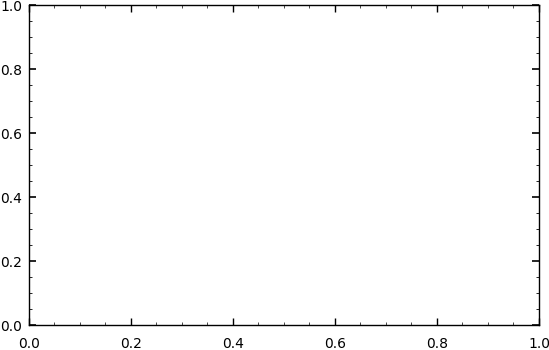

In [10]:
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')
fig, ax = plt.subplots(figsize = (6,4))
#fig.tight_layout(rect=[0,0,.8,1])
ax.plot(E,N)
ax.scatter(locs,avgN,marker = 'x', color = 'red'
        )
ax.set_xlim(-5*10**8,0.75*10**10)
ax.set_xlabel('Energy (eV)', fontsize =11)
ax.set_ylabel('Photon Flux (s cm2)', fontsize =11)
#ax.set_xscale('log')